# **Employee Attrition Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We are going to analyze this dataset from Kaggle. We are trying to come up with the key insights and recommendations for the company to help them understand and mitigate employee attrition. According to Kaggle: 'This dataset contains synthetic data for employee attrition. The data was generated to simulate a scenario where various factors influence whether an employee stays with a company or leaves. This dataset can be used for predictive modeling, data analysis, and machine learning tasks related to employee turnover.'

In [2]:
# read and clean data
df = pd.read_csv('employee_attrition_data.csv')
df.drop('Employee_ID',axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    1000 non-null   int64   
 1   Gender                 1000 non-null   object  
 2   Department             1000 non-null   object  
 3   Job_Title              1000 non-null   object  
 4   Years_at_Company       1000 non-null   int64   
 5   Satisfaction_Level     1000 non-null   float64 
 6   Average_Monthly_Hours  1000 non-null   int64   
 7   Promotion_Last_5Years  1000 non-null   int64   
 8   Salary                 1000 non-null   int64   
 9   Attrition              1000 non-null   int64   
 10  Generation             1000 non-null   object  
 11  Age_Group              1000 non-null   category
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 87.2+ KB


In [3]:
df.isna().sum()

Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [4]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


## **What is the age distribution of the company's employees?**

In [5]:
print(df['Age'].describe())

count    1000.000000
mean       42.205000
std        10.016452
min        25.000000
25%        33.000000
50%        43.000000
75%        51.000000
max        59.000000
Name: Age, dtype: float64


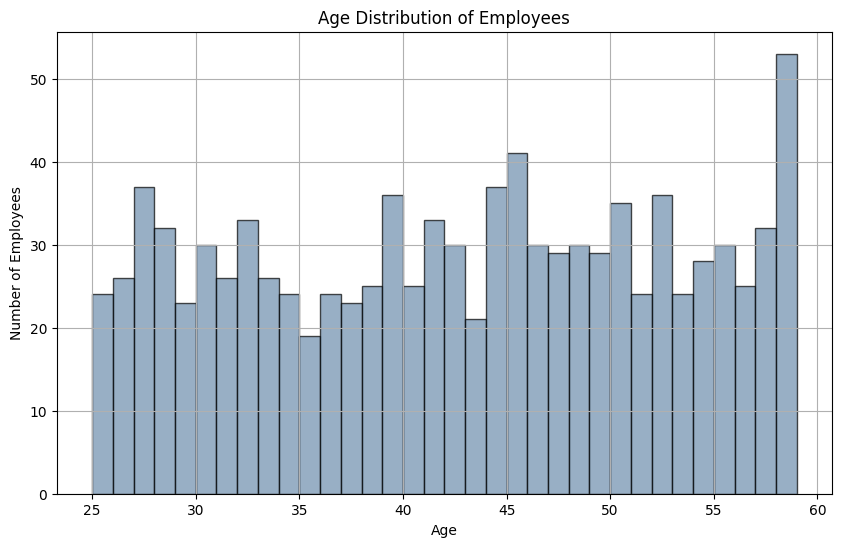

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=range(min(df['Age']), max(df['Age']) + 1, 1), alpha=0.7, color='#6C8EAD', edgecolor='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

### Conclusion：
The age range of employees spans from 25 to 59. And age is evenly spread across the range. There is a little bit variation but there is not really a cluster anywhere. It's intersting to see that the largest age group is 59 years old. 

## **Which departments and positions have higher or lower job satisfaction scores?**

['Marketing' 'Sales' 'Engineering' 'Finance' 'HR']
['Manager' 'Engineer' 'Analyst' 'HR Specialist' 'Accountant']


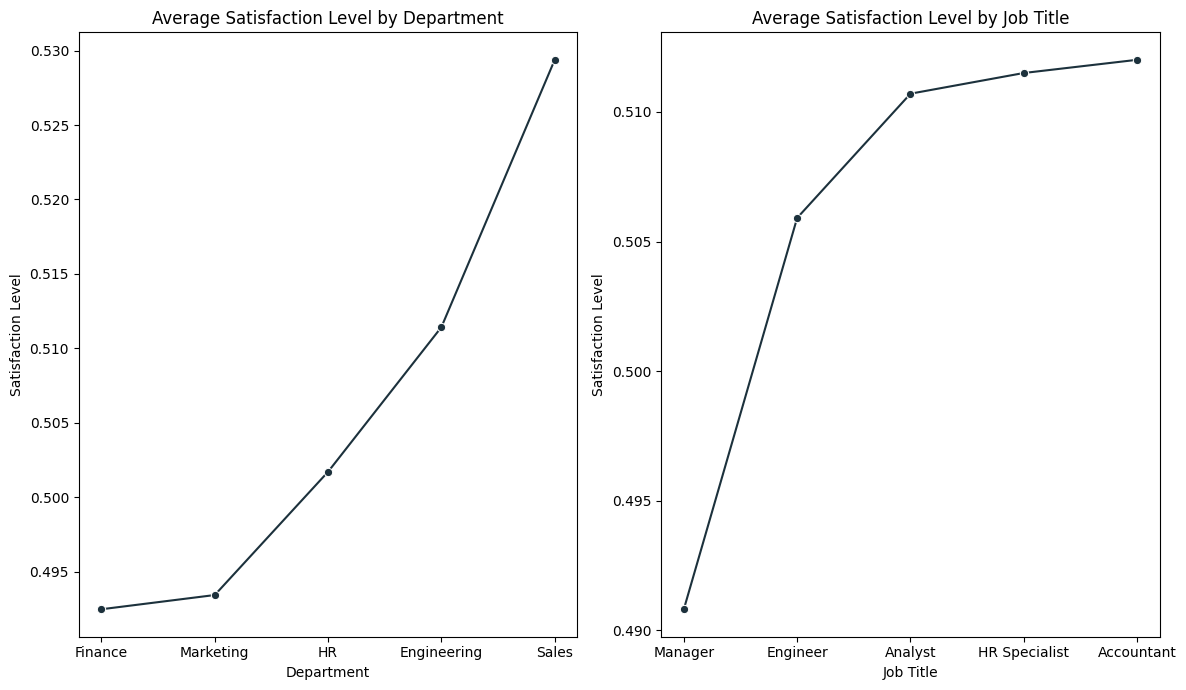

In [7]:
# Check data for any preprocessing needs
print(df['Department'].unique())  # Check unique departments
print(df['Job_Title'].unique())   # Check unique job titles

# Calculate average satisfaction level by department and job title
department_satisfaction = df.groupby('Department')['Satisfaction_Level'].mean().sort_values()
job_title_satisfaction = df.groupby('Job_Title')['Satisfaction_Level'].mean().sort_values()

# Plotting the results
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.lineplot(y=department_satisfaction, x=department_satisfaction.index, marker='o', color='#1C313C')
plt.title('Average Satisfaction Level by Department')
plt.ylabel('Satisfaction Level')
plt.xlabel('Department')

plt.subplot(1, 2, 2)
sns.lineplot(y=job_title_satisfaction, x=job_title_satisfaction.index, marker='o', color='#1C313C')
plt.title('Average Satisfaction Level by Job Title')
plt.ylabel('Satisfaction Level')
plt.xlabel('Job Title')

plt.tight_layout()
plt.show()

## **Let's take a look at each employee's satisfaction level** 

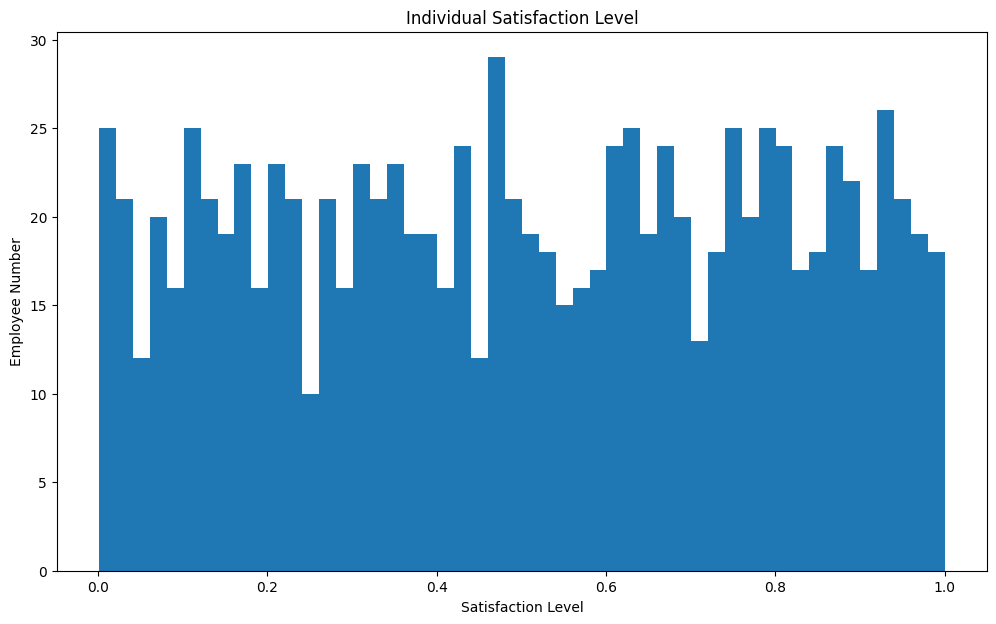

In [8]:
#hist about individual satisfaction level
plt.figure(figsize=(12, 7))
plt.hist(df['Satisfaction_Level'],bins=50)
plt.title('Individual Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Employee Number')
plt.show()

### Conclusion：
From the chart above, it is evident that the Sales department has the highest job satisfaction, while the Finance department has the lowest. The differences in satisfaction levels across other departments show clear upward trend from Finance to Sales. In terms of job titles, managers have the lowest satisfaction, whereas accountants have the highest. The differences in satisfaction levels among other job titles show a significant increase from managers to accountants.Also, another point is that basically all the average employees's satisfaction rate is around 0.5, which implies only a medium level of satisfaction. It could be some of them like this job while some others do not, or could be most people have mediocre attitude to their job. As for the second chart, employee satisfaction levels are distributed across the entire chart, however, in a healthy work environment, employee satisfaction should be concentrated on the right end of this chart. 

## **What is the distribution of average monthly work hours among employees？**

count    1000.000000
mean      199.493000
std        29.631908
min       150.000000
25%       173.000000
50%       201.000000
75%       225.000000
max       249.000000
Name: Average_Monthly_Hours, dtype: float64


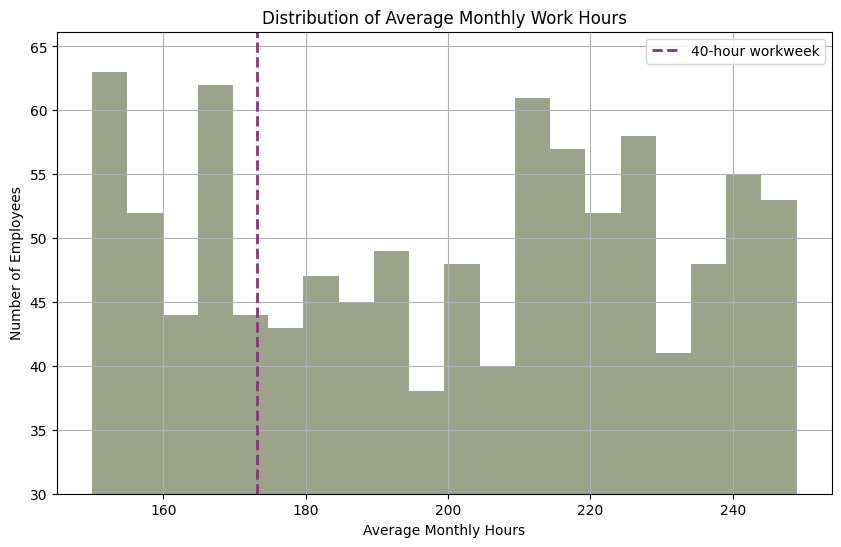

In [9]:
# Check the 'Average_Monthly_Hours' column for any preprocessing needs
print(df['Average_Monthly_Hours'].describe())

# Plotting the distribution of average monthly hours
plt.figure(figsize=(10, 6))
plt.hist(df['Average_Monthly_Hours'], bins=20, color='#717C5A', alpha=0.7)
plt.axvline(173.2, color='#8C3182', linestyle='dashed', linewidth=2, label='40-hour workweek')
plt.title('Distribution of Average Monthly Work Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Number of Employees')
plt.ylim(30)
plt.grid(True)
plt.legend()
plt.show()

### Conclusion：
Considering the standard working hours of 40 hours per week converts to approximately 173 hours per month, this indicates that a substantial number of employees work significantly more than the standard. This distribution may suggest high workload. The variability in working hours could stem from differences in departmental needs, job types, and project cycles.

## **What are the promotion rates in different departments and positions?**

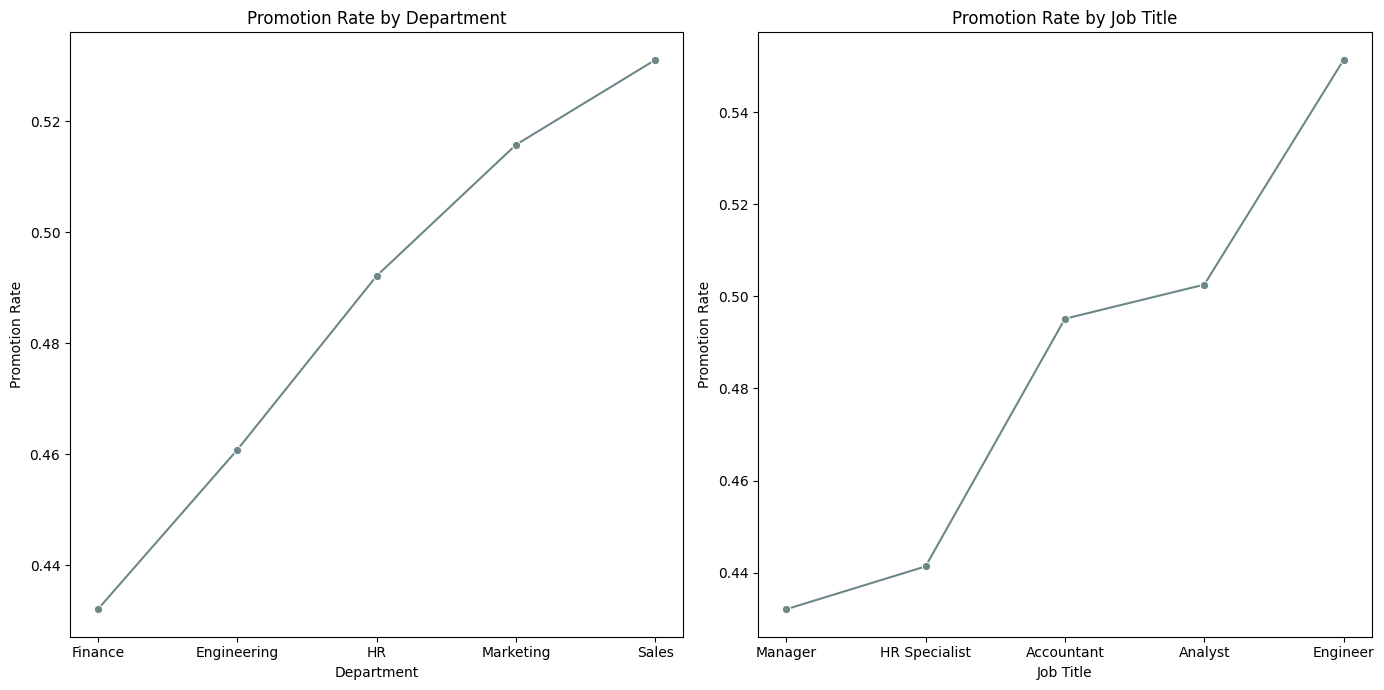

In [10]:
# Calculate the promotion rate by department
promotion_by_department = df.groupby('Department')['Promotion_Last_5Years'].mean().sort_values()

# Calculate the promotion rate by job title
promotion_by_job = df.groupby('Job_Title')['Promotion_Last_5Years'].mean().sort_values()

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.lineplot(y=promotion_by_department, x=promotion_by_department.index, marker='o', color='#6D8789')
plt.title('Promotion Rate by Department')
plt.ylabel('Promotion Rate')
plt.xlabel('Department')

plt.subplot(1, 2, 2)
sns.lineplot(y=promotion_by_job, x=promotion_by_job.index, marker='o', color='#6D8789')
plt.title('Promotion Rate by Job Title')
plt.ylabel('Promotion Rate')
plt.xlabel('Job Title')

plt.tight_layout()
plt.show()

### Conclusion:
From the perspective of promotion rates by department, the Sales department has the fastest promotion rate, followed by the Marketing department, while the Finance and Engineering departments have the lowest promotion rates. In terms of job titles, Engineers are promoted the fastest, whereas Managers and HR Specialists experience the slowest promotions. The promotion rate for other job titles falls between these extremes. Even though there is a difference among different departments or job titles, but it's not big enough to be a problem. 

## **How do years of service at the company affect annual salaries?**

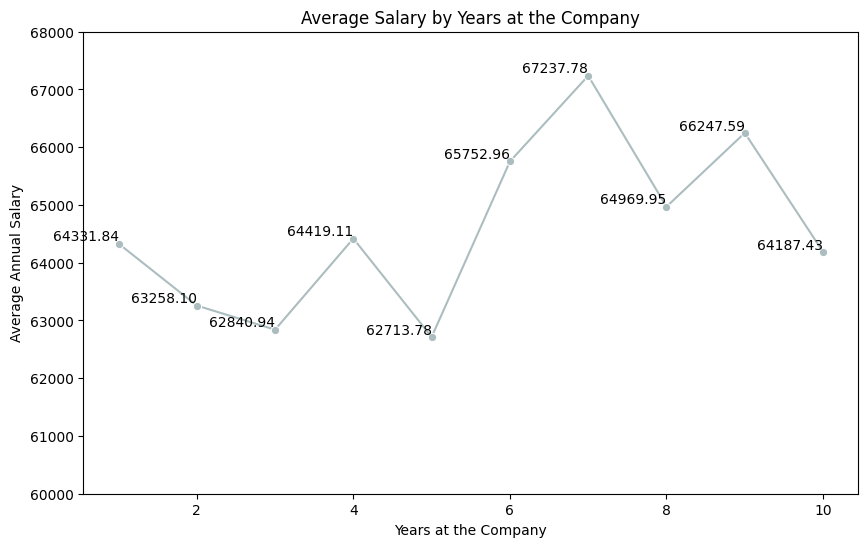

In [11]:
# Calculate the average salary by years at the company
years_salary = df.groupby('Years_at_Company')['Salary'].mean().sort_index()

# Plotting the results as a bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=years_salary.index, y=years_salary.values, marker='o', color='#ACBDC0')

# add values to each turn point
for x, y in zip(years_salary.index, years_salary.values):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')
plt.title('Average Salary by Years at the Company')
plt.xlabel('Years at the Company')
plt.ylabel('Average Annual Salary')
plt.ylim(60000, 68000)
plt.show()

### Conclusion：
The average annual salary varies, with notable peaks and troughs, suggesting that tenure alone does not strongly correlate with a consistent increase in salary.
The highest average annual salary is observed for employees with 7 years of tenure, reaching approximately 67237 dollars. 
On the other hand, the lowest average annual salary is observed for employees with 5 years of tenure, with an average salary of approximately $62,713. 

## **What is the attrition rate across different generations?**

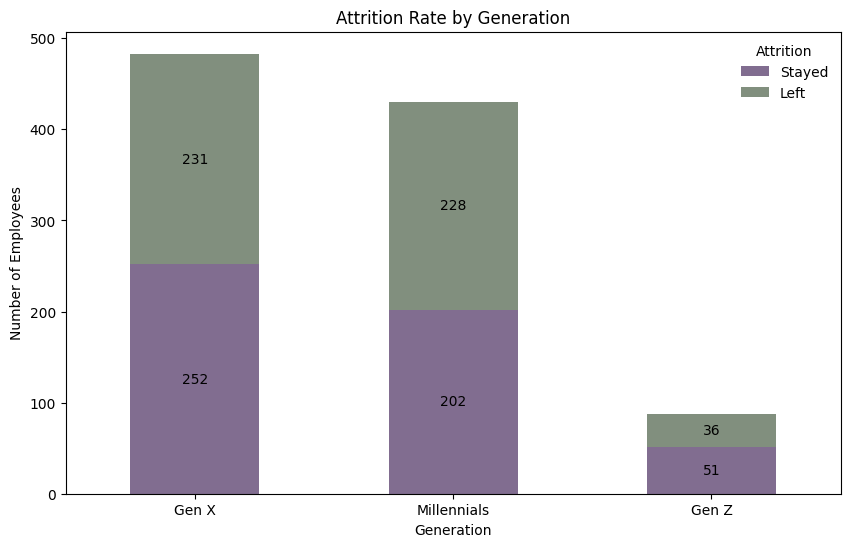

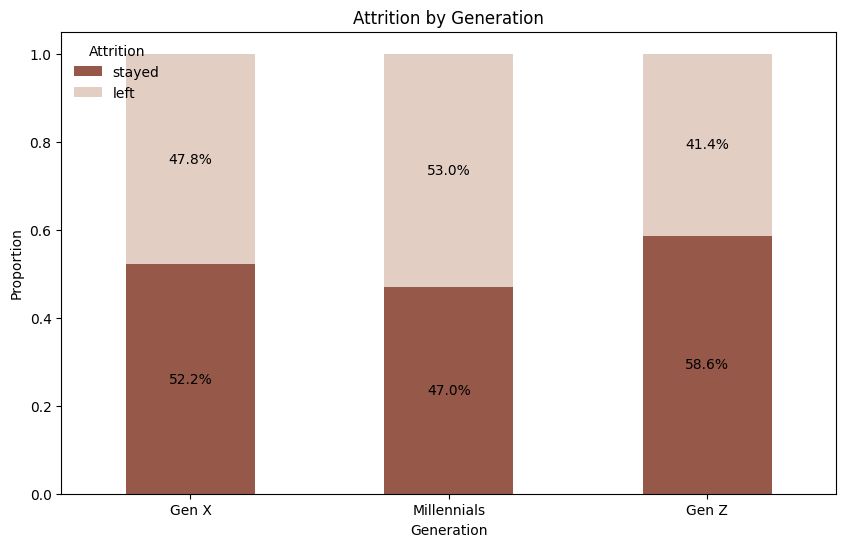

In [12]:
# make a function to select different generations
def determine_generation(row):
    birth_year = 2024 - row['Age']  
    if birth_year >= 1965 and birth_year <= 1980:
        return 'Gen X'
    elif birth_year >= 1981 and birth_year <= 1996:
        return 'Millennials'
    elif birth_year >= 1997:
        return 'Gen Z'

df['Generation'] = df.apply(determine_generation, axis=1)

# count attrition of each generation
generation_counts = df.groupby(['Generation', 'Attrition']).size().unstack(fill_value=0)

# Ensure the order of generations
generation_order = ['Gen X', 'Millennials', 'Gen Z']
generation_counts = generation_counts.loc[generation_order]

# plot
fig, ax1 = plt.subplots(figsize=(10, 6))
bars = generation_counts.plot(kind='bar', stacked=True, ax=ax1, color=['#816D90', '#818F7E'])
ax1.set_title('Attrition Rate by Generation')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Number of Employees')
legend = ax1.legend(title='Attrition', labels=['Stayed', 'Left'])
legend.get_frame().set_alpha(0)
ax1.set_xticklabels(generation_order, rotation=0)

# add values to the bar
for bar in bars.containers:
    bars.bar_label(bar, label_type='center')

#plot 2
# Calculate proportions
generation_proportions = generation_counts.div(generation_counts.sum(axis=1), axis=0)

# Plotting
ax = generation_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#965848','#E3CEC4'])

# Customizing the plot
plt.title('Attrition by Generation')
plt.xlabel('Generation')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
legend = plt.legend(title='Attrition', loc='upper left',labels=['stayed','left'])
legend.get_frame().set_alpha(0)
# Adding percentages on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height*100:.1f}%'
    ax.annotate(percentage, (x + width/2, y + height/2), ha='center', va='center')

plt.show()

### Conclusion:
From the first chart, it can be seen that the number of employees leaving and staying is roughly the same across different generations, except for Gen Z, where slightly more employees stayed than left. To be more precise, we look at the second chart, where it is evident that significantly more Millennials stayed than left. For Gen X and Gen Z, more employees stayed than left. So GenZ is the most loyal to the company while millennials are the least loyal.

## **How does salary distribution change across generations?**

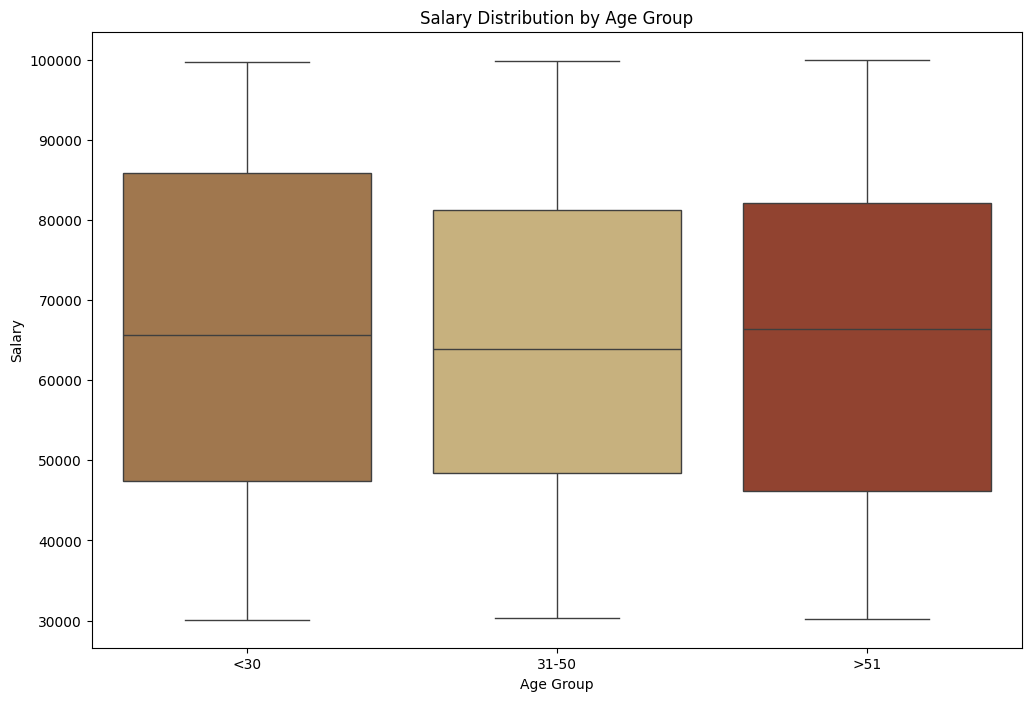

In [13]:
# divide the age then group them
bins = [0, 30, 50, np.inf]
labels = ['<30', '31-50', '>51']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#plot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='Age_Group', y='Salary', data=df)
colors = ['#A0774E', '#C7B17E', '#914330']
for i, patch in enumerate(boxplot.patches):
    color = colors[i % len(colors)]
    patch.set_facecolor(color)
    
#set title and label
plt.title('Salary Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Salary')
plt.show()

### Conclusion:
Employees under 30 and over 51 have similar salary distributions, with larger salary differences and a wider distribution range compared to the middle age group. The median salary for the 31-50 age group is relatively lower, but the distribution is more concentrated, indicating less variation in salaries within this age group. Age doesn't have a big affect on salary.

## **How much tenure do the different age group have?**

Age_Group
31-50    571
>51      287
<30      142
Name: count, dtype: int64


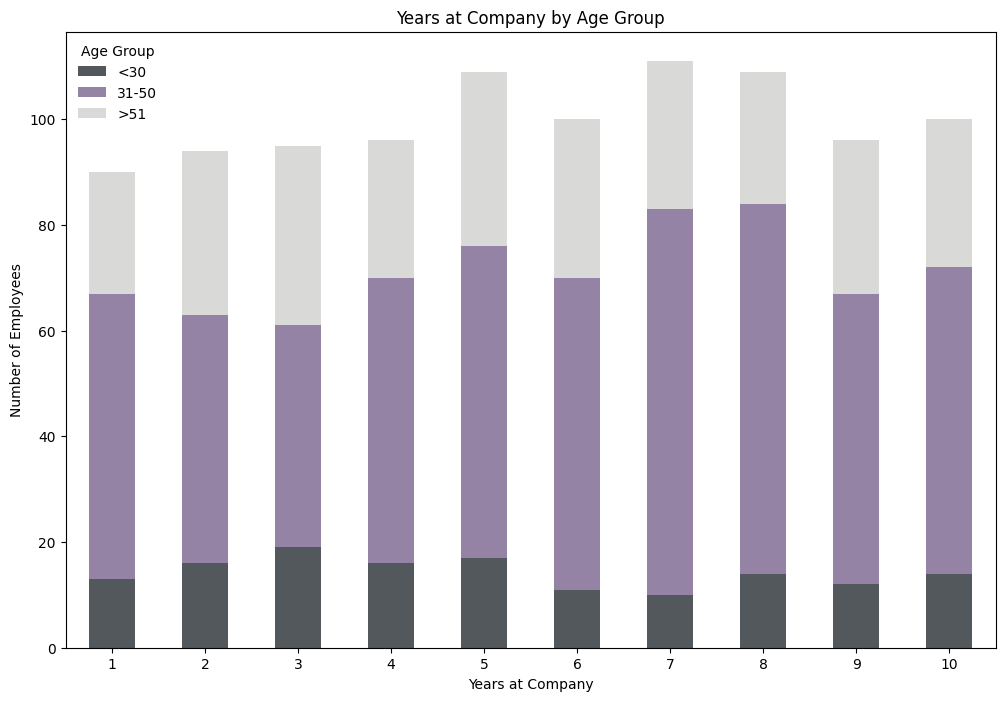

In [14]:
# divide age then create new column
bins = [0, 30, 50, np.inf]
labels = ['<30', '31-50', '>51']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df['Age_Group'].value_counts())

# groupby age by years at the company
age_group_years = df.groupby('Age_Group', observed=False)['Years_at_Company'].value_counts().unstack().fillna(0)

# set color
colors = ['#52585B', '#9583A6', '#D9DAD7']  

# plot stacked bar plot
ax = age_group_years.T.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# set titles and labels
plt.title('Years at Company by Age Group')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
legend = plt.legend(title='Age Group', loc='upper left')
legend.get_frame().set_alpha(0)
plt.xticks(rotation=0)
plt.show()

### Conclusion:
Overall, employee’s age between 31-50 occupy the largest proportion across various tenures. This indicates that the 31-50 age group is the backbone of the company.
Employees under the age of 30 have a relatively smaller proportion across various tenures, especially in tenures of 5 years and above. This suggests that younger employees have a lower rate of long-term retention in the company.
Employees over the age of 51 are more evenly distributed across tenures of 1 to 10 years, but their overall number is fewer than that of the 31-50 age group. This indicates that older employees are relatively fewer in the company.

## **How does salaried affect attrition rate?**

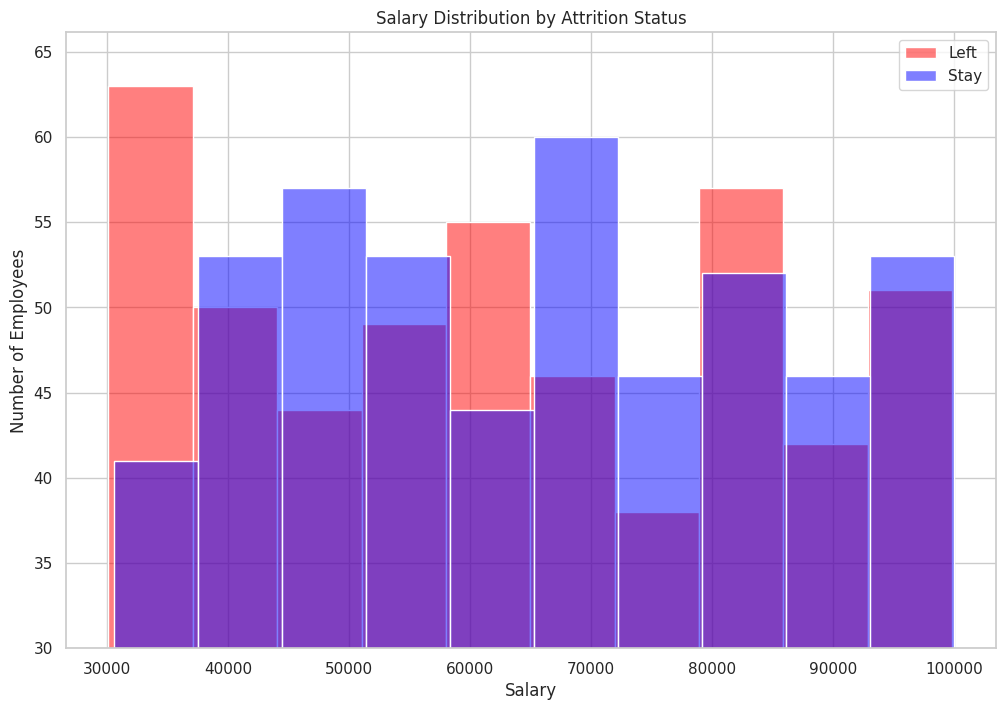

In [15]:
# set style
sns.set(style="whitegrid")

# plot
plt.figure(figsize=(12, 8))
sns.histplot(df[df['Attrition'] == 1]['Salary'], bins=10, kde=False, color='red', alpha=0.5, label='Left')
sns.histplot(df[df['Attrition'] == 0]['Salary'], bins=10, kde=False, color='blue', alpha=0.5, label='Stay')

# set title and labels
plt.title('Salary Distribution by Attrition Status')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.ylim(30)
plt.legend()
plt.show()

### Conclusion：
In the low salary range, the number of employees who left is significantly higher than those who stayed, especially at the $30,000 salary level. Medium and high salary employees are more likely to stay. This finding suggests that appropriate compensation policies can effectively increase employee retention rates.

## Recommandations:

Based on the conclusions above, here are some recommendations:

1. Adjust the job title structure, such as providing promotion opportunities for employees with a certain number of years of service.
2. Improve the salary adjustment framework for different departments to balance the salary levels of employees in various departments. For example, regularly compile statistics on the performance of employees in different departments and match salaries and job titles based on the degree of work completion.
3. Encourage work-life balance by controlling employee working hours to be around 40 hours per week.

Following these recommendations should improve employee satisfaction, thereby reducing the attrition rate.

---